
This Jupiter notebook is used to download, pre-process and save data about all test data in the Czech Republic from the webpage of the Czech...... Output from this notebook is CSV file with downloaded data about........ that will be further processed, cleaned and aggregated.

os package is used only to check whether we are in the correct working directory.

In the def, we will be applying methods from requests (downloading site content), BeautifulSoup (machine reading of downloaded data), tqdm (interactive measurement of the downloading progress) and time (setting pause between requests from the site) packages.

After the data are downloaded we use pandas to pre-process and save them.

After downloading the packages, I will check the data structure in order to make sure that we can scrape the given information here below we used BeutfulSoup library to request the data.

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from tqdm import tqdm
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
html_text = requests.get("https://testovani.uzis.cz/").text.strip()
soup = BeautifulSoup(html_text, 'lxml')

In [3]:
for a in soup.find_all('a', class_ = "list__link", href=True):
    print ("Found the URL:", a['href'])

Found the URL: /Detail?id=a81a99e2-90bd-494c-ae42-7090f93115ca&backURL=/
Found the URL: /Detail?id=42c85d23-21e4-4fe9-baef-9ab06c0cbe6d&backURL=/
Found the URL: /Detail?id=4bf34117-aadf-400d-91ec-77dc8633874f&backURL=/
Found the URL: /Detail?id=e3bc023c-27a1-496f-8a5c-665b0e103e60&backURL=/
Found the URL: /Detail?id=4e6f8c5e-1b70-4289-a2ab-ae9065304eb5&backURL=/
Found the URL: /Detail?id=5fe2de84-e229-4505-8cc3-4a7d11035228&backURL=/
Found the URL: /Detail?id=3960f5a9-8269-487c-8b93-f1fee91346ce&backURL=/
Found the URL: /Detail?id=755322f8-8f3d-4048-94d6-d01a39701638&backURL=/
Found the URL: /Detail?id=3c58898a-034a-4056-80c6-d3f14748f54c&backURL=/
Found the URL: /Detail?id=2f2efdc8-63ea-4ab1-b6cd-9f39896ee2d8&backURL=/
Found the URL: /Detail?id=8c49206d-ff94-4183-a1eb-df190d9f345b&backURL=/
Found the URL: /Detail?id=0d6a6d59-1ae7-43d8-8dc1-a8ecbb8a425c&backURL=/
Found the URL: /Detail?id=5ecf72d5-b142-4aa6-aeef-0a93fd9370df&backURL=/
Found the URL: /Detail?id=2a479c5c-7a9a-4c1a-ba15-0

In [4]:
testingCenterHyperlinkTags = soup.find_all('a', class_ = "list__link", href=True)

TestCenterIds = []

for testingCenterHyperlinkTag in testingCenterHyperlinkTags[:5]:
    testingCenterHyperlink = testingCenterHyperlinkTag['href'][11:47]
    print ("Found the id:", testingCenterHyperlink)
    TestCenterIds.append(testingCenterHyperlink)

TestCenterIds[0:5]

Found the id: a81a99e2-90bd-494c-ae42-7090f93115ca
Found the id: 42c85d23-21e4-4fe9-baef-9ab06c0cbe6d
Found the id: 4bf34117-aadf-400d-91ec-77dc8633874f
Found the id: e3bc023c-27a1-496f-8a5c-665b0e103e60
Found the id: 4e6f8c5e-1b70-4289-a2ab-ae9065304eb5


['a81a99e2-90bd-494c-ae42-7090f93115ca',
 '42c85d23-21e4-4fe9-baef-9ab06c0cbe6d',
 '4bf34117-aadf-400d-91ec-77dc8633874f',
 'e3bc023c-27a1-496f-8a5c-665b0e103e60',
 '4e6f8c5e-1b70-4289-a2ab-ae9065304eb5']

In [5]:
test_centers = soup.find_all('div', class_="list__result")

header = soup.find('div', class_="list__headline").text.strip()
print(f" Header: {header}") 

for test_center in test_centers:
    company_name = test_center.find('span', class_="list__col").text.replace('\n ', '')
    #callendar= test_center.find('div', class_="main")#.text.replace('\n ', '')
    print(f" Company Name : {company_name.strip()}")   
    print(' ')

 Header: Hlavní město Praha (Počet OM: 122 - V následujících 3 dnech volná/celková kapacita: 57266 / 67436)
 Company Name : #NaŽádanku.cz – Odběrové centrum Praha 15 (H. Měcholupy)
 
 Company Name : #Vyšetři.mě – Odběrové centrum Praha 15 (H. Měcholupy)
 
 Company Name : #Vyšetři.mě – Odběrové centrum Praha 6 (Ruzyně)
 
 Company Name : AESKULAB - odběrové místo VIVO Hostivař
 
 Company Name : AESKULAB Praha 6 - OM poliklinika DAM, Brixiho
 
 Company Name : AESKULAB Praha 8 - Mazurská
 
 Company Name : AESKULAB Praha Čs.exilu
 
 Company Name : AKESO holding - odběrové místo Praha Eden
 
 Company Name : AKESO holding - odběrové místo Praha Chlumecká
 
 Company Name : AKESO holding - OM Jeremiášova, Praha 5 - Stodůlky
 
 Company Name : AKESO holding - OM Seydlerova, Praha 5 - Nové Butovice (Poliklinika Lípa)
 
 Company Name : AKESO holding - OM Stroupežnického, Praha 5 - Anděl
 
 Company Name : AURUM CLINIC s.r.o. - odběrové místo Zborovská
 
 Company Name : Booster event s.r.o. - odběrov

In [6]:
header = soup.find('div', class_="list__headline").text.strip()
header 

'Hlavní město Praha (Počet OM: 122 - V následujících 3 dnech volná/celková kapacita: 57266 / 67436)'

In [7]:
def get_page_links(url): 
    sleep(0.2) 
    base_url='https://testovani.uzis.cz/'
    r = requests.get(url)
    soup= BeautifulSoup(r.text,'lxml')
    links=soup.select('div.list__result a')
    return[ base_url + link.attrs['href'] for link in links]

In [8]:
def test_locatio_detail(url):
    r = requests.get(url)
    soup= BeautifulSoup(r.text,'lxml')
    company_details={
        'Name':soup.select_one('div.detail__main h1').text.strip().replace('\n',' '),
        'Address':soup.select_one('div.info td:nth-child(2)').text.strip().replace('\n',''),
        'Upřesnění polohy':soup.select_one('div.info :nth-child(2) td:nth-child(2)').text.strip().replace('\n',''),
        'Telefon':soup.select_one('div.info a').text.strip().replace('\n',''),
        #'Poznámka':soup.select_one('div.info :nth-child(4) td:nth-child(2)').text.strip().replace('\n','').replace('\n',' '),
        'Příjem':soup.select_one('div.info :nth-child(5) td:nth-child(2)').text.strip().replace('\n','').replace('\n',' '),
        'Cena za samoodběr':soup.select_one('div.info :nth-child(6) td:nth-child(2)').text.strip().replace('\n','').replace('\n',' '),
        'Způsob rezervace':soup.select_one('div.info :nth-child(7) td:nth-child(2)').text.strip().replace('\n','').replace('\n',' '),
        'Odkaz na rezervační systém':soup.select_one('div.info :nth-child(8) td:nth-child(2)').text.strip().replace('\n',''),
        'DRIVE-IN':soup.select_one('div.info :nth-child(9) td:nth-child(2)').text.strip().replace('\n',''),
        'Calendar':soup.select_one('div.slots__list').text.strip().replace('\n',' ')
        #'Av_days':pd.DataFrame([soup.select_one('div.opening').text.strip().replace('\n','')])
   
    }
    #print(company_details)    
    return company_details

f=test_locatio_detail('https://testovani.uzis.cz//Detail?id=b84211a4-9c9e-4773-8439-71bb18fde2d4&backURL')
pd.DataFrame(f,index=['1',])

,Name,Address,Upřesnění polohy,Telefon,Příjem,Cena za samoodběr,Způsob rezervace,Odkaz na rezervační systém,DRIVE-IN,Calendar
1,"Vsetínská nemocnice, a.s., odběrové místo","Nemocniční 955, 755 01 Vsetín",pavilon K,571818384,Osoby se žádankou i samoplátce,,Rezervační systém Reservatic,nemocnice-vs.cz,Ne,Ne 24.10. Zavřeno Po 25.10. Maximální ...


In [10]:
def main():
   #results=[]
   urls= get_page_links('https://testovani.uzis.cz/')
   comp_info=pd.DataFrame([test_locatio_detail(url) for url in tqdm(urls)])
   #results.append(comp_info)
   return comp_info

In [11]:
df=main()# to store the value in df object to utilize the usage

100%|██████████| 419/419 [03:19<00:00,  2.10it/s]


In [12]:
df.head()

,Name,Address,Upřesnění polohy,Telefon,Příjem,Cena za samoodběr,Způsob rezervace,Odkaz na rezervační systém,DRIVE-IN,Calendar
0,#NaŽádanku.cz – Odběrové centrum Praha 15 (H. ...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,+420774605535,Osoby se žádánkou (od lékaře/KHS),,Přes webové stránky na přesný čas,www.nazadanku.cz,Ne,Ne 24.10. Maximální kapacita Po 25.10. ...
1,#Vyšetři.mě – Odběrové centrum Praha 15 (H. Mě...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,+420771156107,Osoby se žádankou i samoplátce,,Přes webové stránky,www.vysetri.me,Ne,Ne 24.10. Maximální kapacita Po 25.10. ...
2,#Vyšetři.mě – Odběrové centrum Praha 6 (Ruzyně),Drnovská 1112/60 161 00 Praha 6 - Ruzyně,Příjezdová cesta zezadu budovy (naproti adrese...,+420771156107,Osoby se žádankou i samoplátce,,Přes webové stránky,www.vysetri.me,Ano,Ne 24.10. Maximální kapacita Po 25.10. ...
3,AESKULAB - odběrové místo VIVO Hostivař,"Praha 10, Švehlova 1391/32","Odběrové místo - OC VIVO Hostivař, parkoviště",+420800737383,Osoby se žádankou i samoplátce,,www.rezervace.aeskulab.cz,rezervace.aeskulab.cz,Ne,Ne 24.10. Žádná data Po 25.10. Žádná d...
4,"AESKULAB Praha 6 - OM poliklinika DAM, Brixiho","Brixiho 1968/1, 162 00 Praha 6 - Břevnov","Poliklinika DAM, samostatný vchod vpravo z Bri...",+420800737383,Osoby se žádankou i samoplátce,,Přes webové stránky,rezervace.aeskulab.cz,Ne,Ne 24.10. Zavřeno Po 25.10. Volná kapa...


In [15]:
df.to_csv('Covid.csv', encoding='utf-8-sig')

We will next load the data to our working directory to process data and put it in commercially friendly way

Getting capacities info from each calendar line


As I have saved the Covid.csv for further use in excel or statistical programs.

Next I need to Scrap the given web sites calnder inofrmation here I will use OOP which is effecticve and clean.

In [13]:
class CalendarByDate:

    def __init__(self, url):
        self.content = requests.get(url).text

    def get_info(self):
        soup = BeautifulSoup(self.content,features="html.parser")
        table = soup.find('div', attrs={'class': 'info'})
        table_body = table.find('table')
        rows = table_body.find_all('tr')
        data = []
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)
        dict = {}
        for datum in data:
            dict[datum[0]] = datum[1]
        return dict
    def get_calendar(self):
        soup = BeautifulSoup(self.content, features="html.parser")
        table = soup.find('div', attrs={'class': 'slots__list'})
        tops = table.find_all('div',attrs={'class': 'slots__top'})
        toplist = []
        for top in tops:
            p0 = top.find_all('p')[0].text
            p1 = top.find_all('p')[1].text
            toplist.append('{} {}'.format(p0,p1))
        bottoms = table.find_all('div', attrs={'class': 'slots__bottom'})
        bottomlist = []
        for bottom in bottoms:
            p = bottom.find('p').text
            bottomlist.append(p)
        dict = {}
        for x in list(zip(toplist,bottomlist)):
            dict[x[0]] = x[1]
        return dict

In [14]:
url = "https://testovani.uzis.cz/Detail?id=42c85d23-21e4-4fe9-baef-9ab06c0cbe6d&backURL=/"
obj = CalendarByDate(url)
info = obj.get_info()
print('Clinic information:')
tbl1 = pd.DataFrame(info.items(), columns=['Name', 'Value'])
print(tbl1)
calendar = obj.get_calendar()
print('Clinic calendar:')
tbl2 = pd.DataFrame(calendar.items(), columns=['Date', 'Capacity'])
print(tbl2)

Clinic information:
                         Name  \
0                      Adresa   
1            Upřesnění polohy   
2                     Telefon   
3                    Poznámka   
4                      Příjem   
5           Cena za samoodběř   
6            Způsob rezervace   
7  Odkaz na rezervační systém   
8                    DRIVE-IN   

                                               Value  
0  Park na křižovatce ulic Ravennská a Milánská, ...  
1  Zelené oplocení v parku na křižovatce ulic Rav...  
2                                      +420771156107  
3  Rezervaci je nutno provést na webových stránká...  
4                     Osoby se žádankou i samoplátce  
5                                                     
6                                Přes webové stránky  
7                                     www.vysetri.me  
8                                                 Ne  
Clinic calendar:
        Date                  Capacity
0  Ne 24.10.        Maximální kapacita
1  P

As we see above it works very well to extract the calendar data, also I added for clininc info where values should match. 

Next I want show the grap of the Available slots in the provided website.
only i added several lines to the main OOP to show the grap, it took great deal of time to think which graph and data can be 
useful. ( I am so sorry for the comment but I do not know Czech, and my partner who knows Czech left me, and it was her idea 
        to interpret the Czech web site.)

In [15]:

class ClinicList:
    def __init__(self):
        self.url = 'https://testovani.uzis.cz/'
        self.content = requests.get(self.url).text

    def data(self):
        soup = BeautifulSoup(self.content, features="html.parser")
        list__result = soup.find_all('div', attrs={'class': 'list__result'})
        l = []
        for res in list__result:
            url = self.url+res.find('a', attrs={'class': 'list__link'}).get('href').strip()
            name = res.find('span', attrs={'class': 'list__col'}).text.strip()
            l.append({
                'name': name,
                'url': url,
            })
        return l

class CalendarByDate:

    def __init__(self, url):
        self.content = requests.get(url).text

    def get_info(self):
        soup = BeautifulSoup(self.content,features="html.parser")
        table = soup.find('div', attrs={'class': 'info'})
        table_body = table.find('table')
        rows = table_body.find_all('tr')
        data = []
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)
        dicta = {}
        for datum in data:
            dicta[datum[0]] = [datum[1]]
            
        table = soup.find('div', attrs={'class': 'slots__list'})
        tops = table.find_all('div',attrs={'class': 'slots__top'})
        toplist = []
        for top in tops:
            p0 = top.find_all('p')[0].text
            p1 = top.find_all('p')[1].text
            toplist.append('{} {}'.format(p0,p1))
        bottoms = table.find_all('div', attrs={'class': 'slots__bottom'})
        bottomlist = []
        available=[]
        total=[]
        for bottom in bottoms:
            p = bottom.find('p').text
            vals=p.replace("Volná kapacita","").strip().split()
            try:
                p=int(vals[2])-int(vals[0])
                available.append(int(vals[0]))
                total.append(int(vals[2]))
                bottomlist.append(p)
            except Exception as e:
#                 print(e)
                bottomlist.append(0)
                available.append(0)
                total.append(0)
        dicta={"Total":total,"Booked":bottomlist,"Available":available}
        return pd.DataFrame(dicta,index=toplist)

https://testovani.uzis.cz//Detail?id=a81a99e2-90bd-494c-ae42-7090f93115ca&backURL=/
Address:
#NaŽádanku.cz – Odběrové centrum Praha 15 (H. Měcholupy)
-----------------------
Graph : 


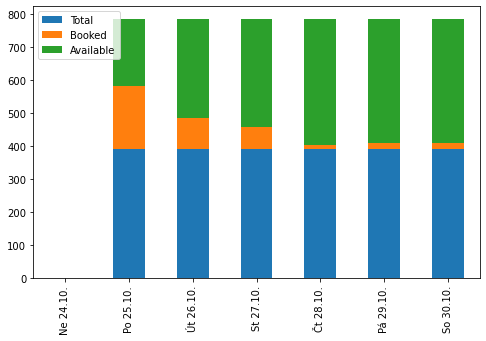

Clinic information:
           Total  Booked  Available
Ne 24.10.      0       0          0
Po 25.10.    392     189        203
Út 26.10.    392      94        298
St 27.10.    392      66        326
Čt 28.10.    392      10        382
Pá 29.10.    392      17        375
So 30.10.    392      18        374


In [19]:
clinic = ClinicList()
for cl in clinic.data()[:1]:# you can add how many you want to show.
    url = cl['url']
    print(url)
    obj = CalendarByDate(url)
    info = obj.get_info()
    print("Address:")
    print("=====================================================")
    print(cl['name'])
    print("-----------------------")
    print("Graph : ")
    if info.Available.sum():
        ax=info.plot.bar(figsize=(8,5),stacked=True)
        plt.show()
    else:
        print("Graph not displayed since data is not present")
    print('Clinic information:')
    print(info)